In [1]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import rv_discrete, rv_continuous, norm
from scipy.integrate import quad
from scipy.interpolate import interp1d
import random

## Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge
from Theoretical_boundaries_visualization_functions import compute_error, f_t_sup, normal_boundary_ABEL, normal_boundary_EDUARDO
from Theoretical_boundaries_visualization_functions import normal_boundary_ABEL_step_by_step, normal_boundary_EDUARDO_step_by_step

# Exact optimal stopping boundary for a Dirac Delta distribution

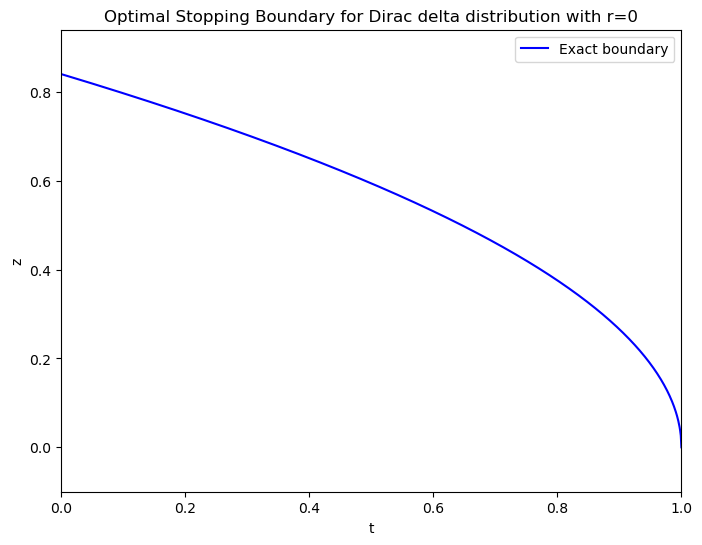

In [3]:
# Pinning point
r = 0

# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
plt.xlabel("t")
plt.ylabel("z")
plt.title(f"Optimal Stopping Boundary for Dirac delta distribution with r={r}")
plt.legend()
plt.xlim(0, 1)
plt.ylim(np.min(exact_boundary)-0.1, np.max(exact_boundary)+0.1)
plt.show()

# Theoretical optimal stopping boundary for a Normal distribution with standard deviation lower than 1

## f_t(u) visualization

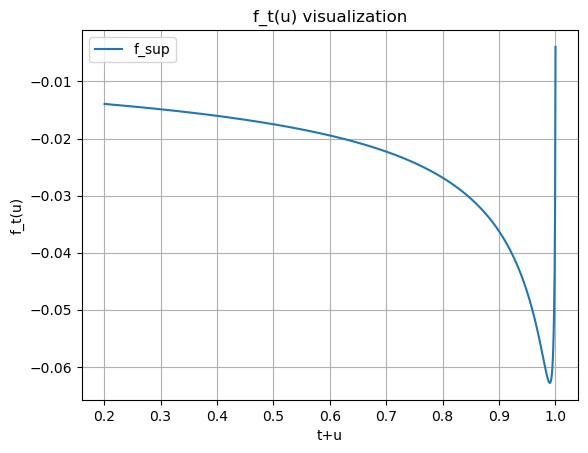

In [4]:
# Parameters
m = 0
gamma = 1/10
t = 0.2
b_t = m/(1-gamma**2)

# t+u mesh
eval_mesh = np.linspace(t, 1, 1000)
u = np.diff(eval_mesh)
b_tu = np.full_like(eval_mesh[1:], b_t)

# f_t(u)
f_sup = f_t_sup(m, gamma, t, b_t, u, eval_mesh[1:], b_tu, pers = "Eduardo")

# Plotting
plt.plot(eval_mesh[1:], f_sup, label="f_sup")
plt.xlabel("t+u")
plt.ylabel("f_t(u)")
plt.title("f_t(u) visualization")
plt.grid(True)
plt.legend()
plt.show()

## h(t,z) when gamma tends to 0

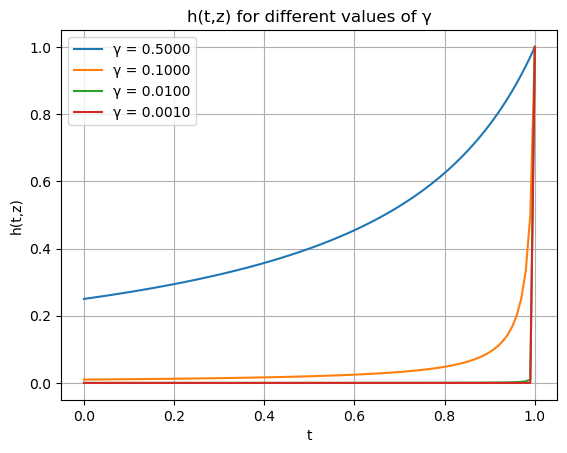

In [5]:
# t mesh and z
mesh = 100
t_mesh = np.linspace(0, 1, mesh)
z = 1

# Parameters
m = 0
gammas = np.array([1/2, 1/10, 1/100, 1/1000])

# Plotting
plt.figure()
for gamma in gammas:
    c1 = (1 - gamma**2)
    h = lambda t: (z * gamma**2 + m * (1 - t)) / (1 - t * c1)
    h_vals = h(t_mesh)
    plt.plot(t_mesh, h_vals, label=f"γ = {gamma:.4f}")
    
plt.xlabel("t")
plt.ylabel("h(t,z)")
plt.title("h(t,z) for different values of γ")
plt.legend()
plt.grid(True)
plt.show()

## Boundary step by step Abel

0 1.0


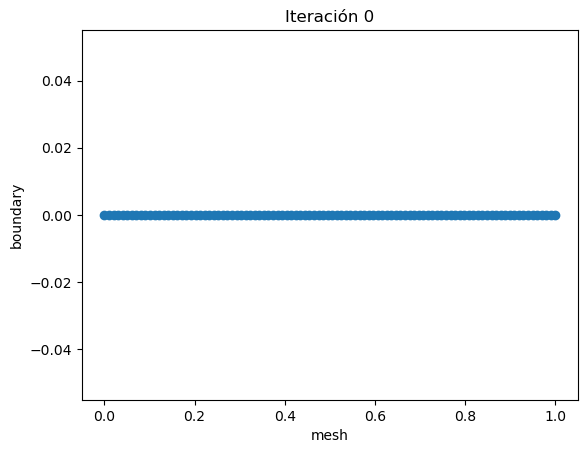

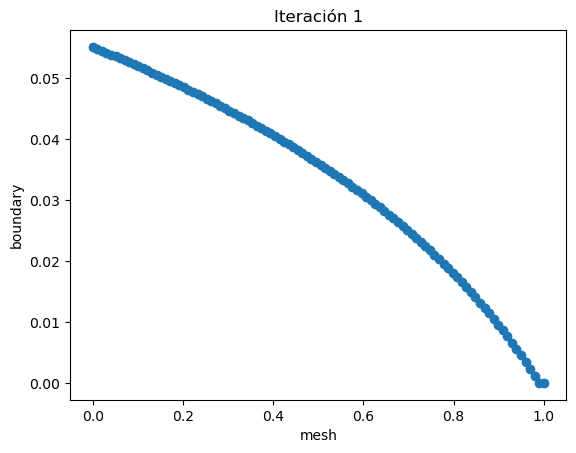

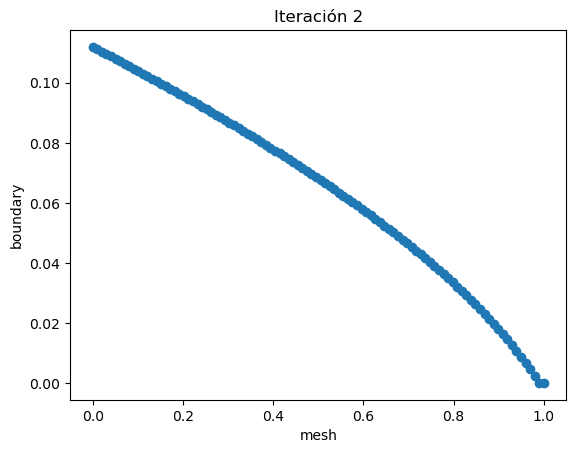

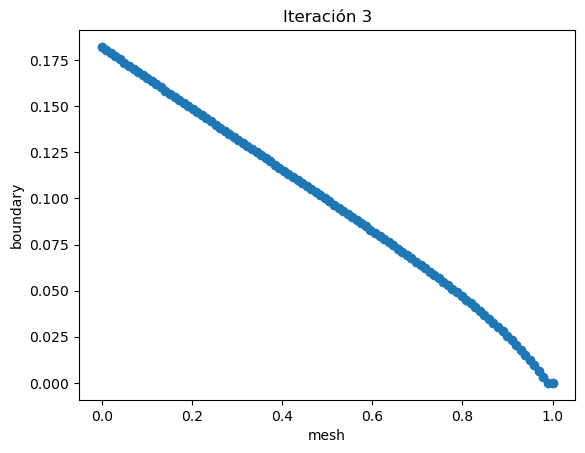

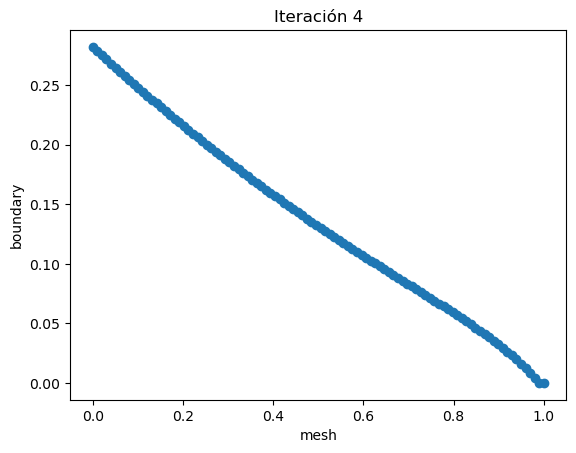

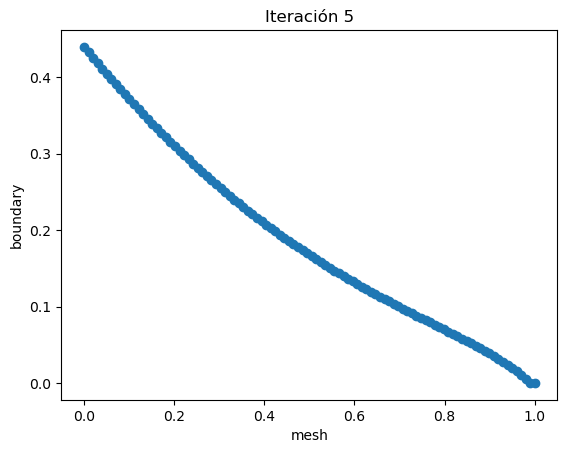

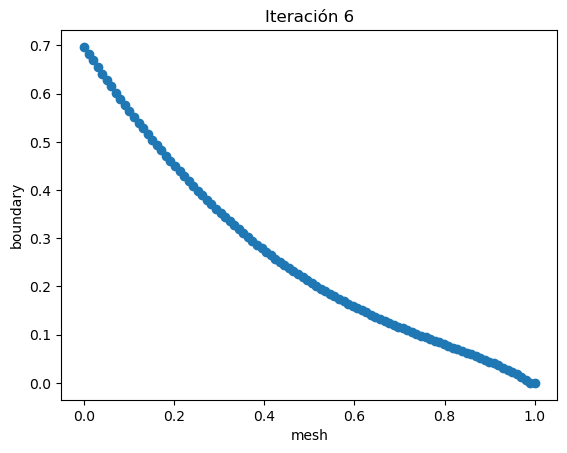

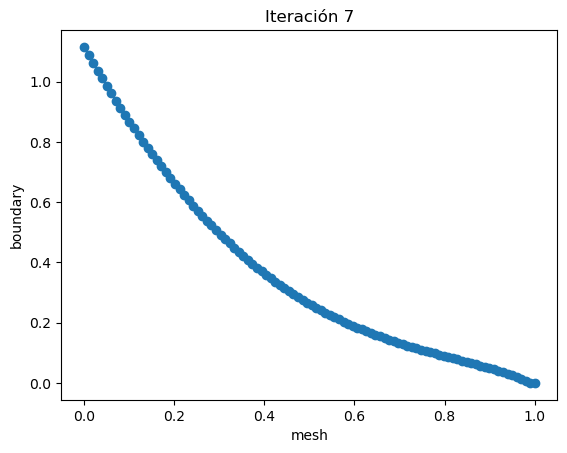

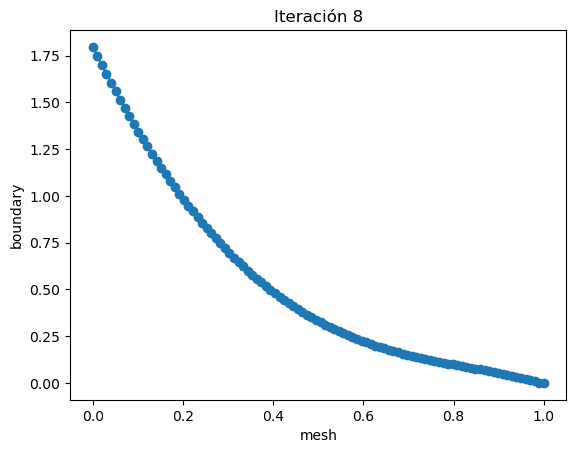

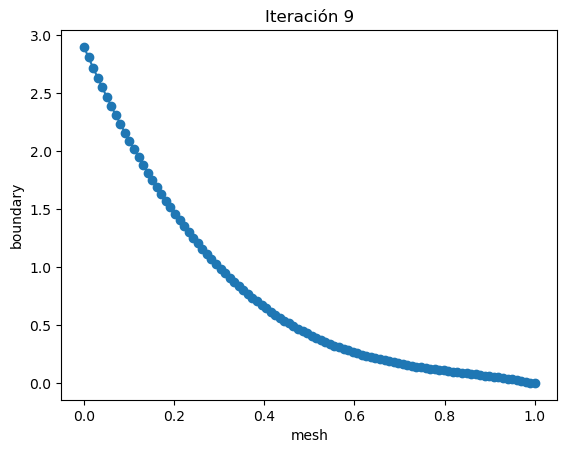

array([4.68904496, 4.52668055, 4.36862144, 4.21479452, 4.06512707,
       3.91954673, 3.77798156, 3.64036001, 3.50661096, 3.37666368,
       3.2504479 , 3.12789379, 3.00893195, 2.89349348, 2.78150989,
       2.67291322, 2.56763597, 2.46561112, 2.36677217, 2.27105314,
       2.17838855, 2.08871346, 2.00196346, 1.91807471, 1.83698393,
       1.75862841, 1.68294603, 1.60987526, 1.53935519, 1.47132553,
       1.40572662, 1.34249944, 1.28158561, 1.22292743, 1.16646786,
       1.11215057, 1.05991991, 1.00972096, 0.96149953, 0.91520218,
       0.87077625, 0.82816986, 0.78733194, 0.74821228, 0.71076153,
       0.67493127, 0.64067403, 0.60794335, 0.57669384, 0.54688117,
       0.51846213, 0.49139463, 0.46563759, 0.44115086, 0.41789502,
       0.39583111, 0.37492032, 0.35512362, 0.33640149, 0.31871357,
       0.3020185 , 0.28627381, 0.27143595, 0.2574604 , 0.24430192,
       0.23191483, 0.22025334, 0.20927194, 0.19892567, 0.18917049,
       0.17996353, 0.1712633 , 0.1630298 , 0.1552247 , 0.14781

In [6]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_ABEL_step_by_step(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6, max_iter=10)

## Boundary step by step Eduardo

0 1.0


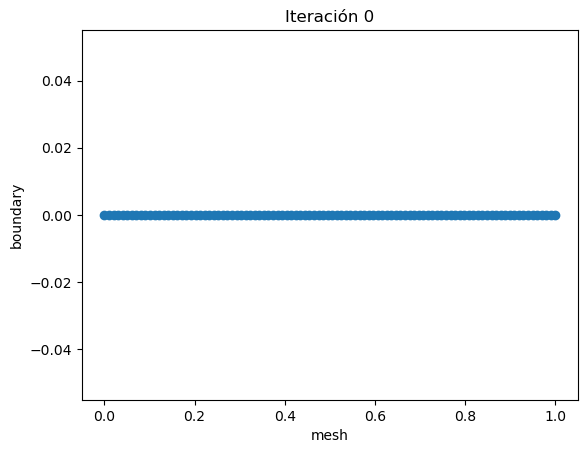

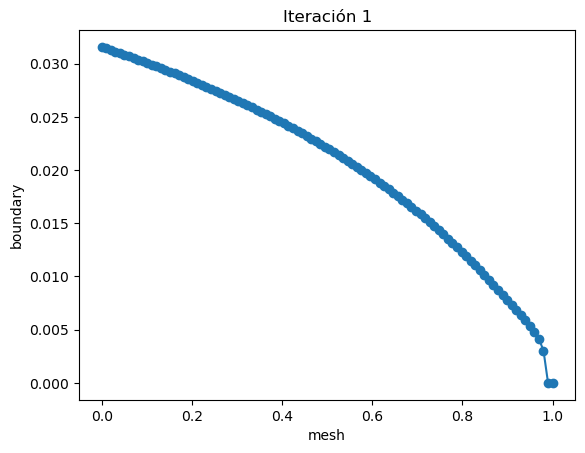

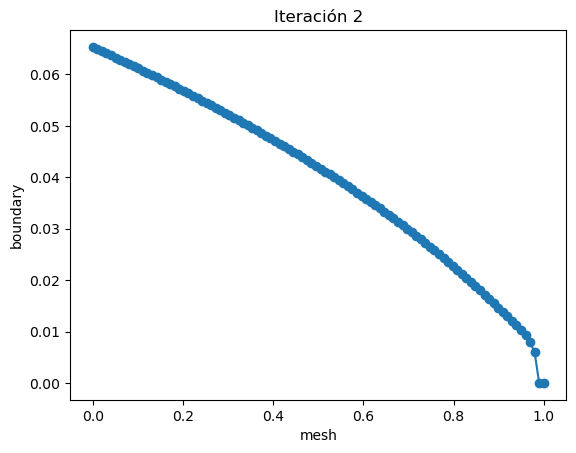

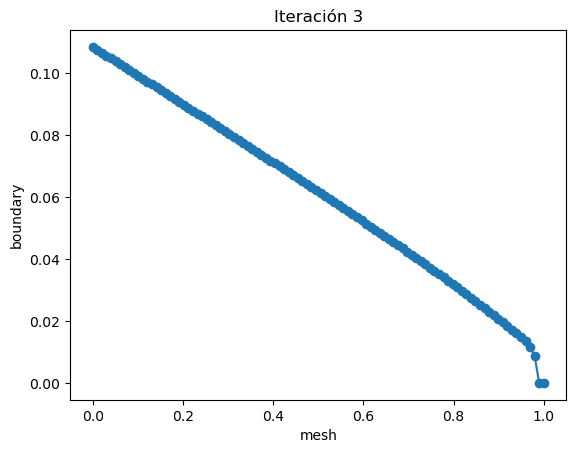

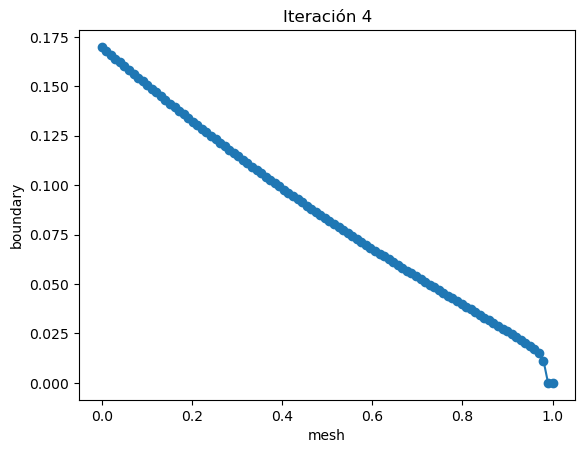

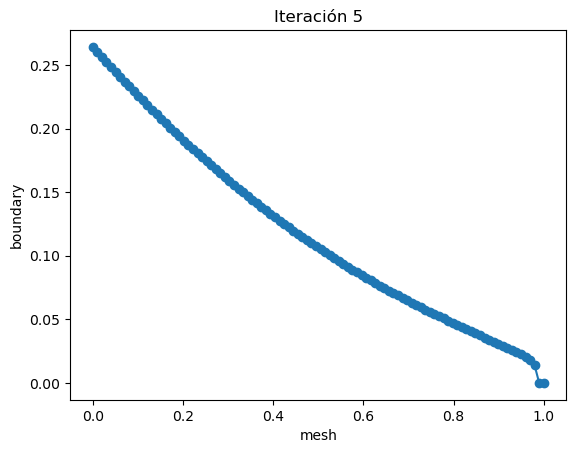

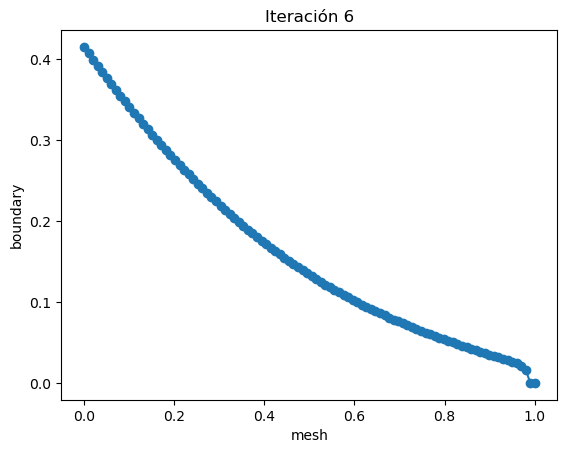

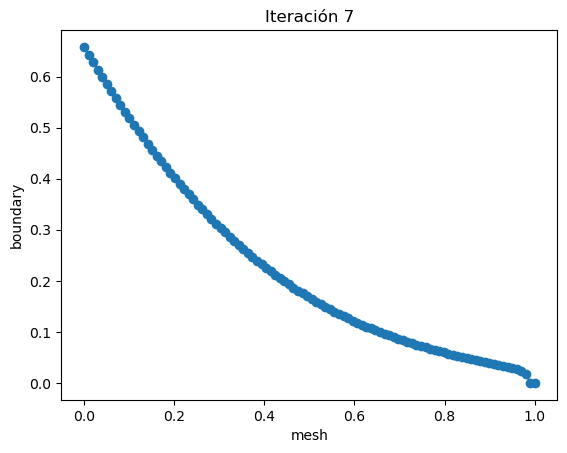

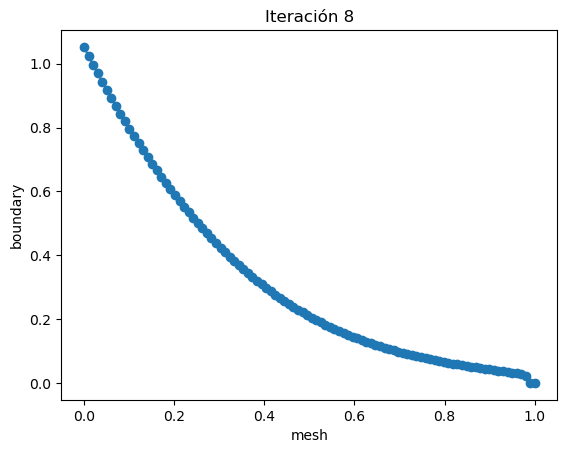

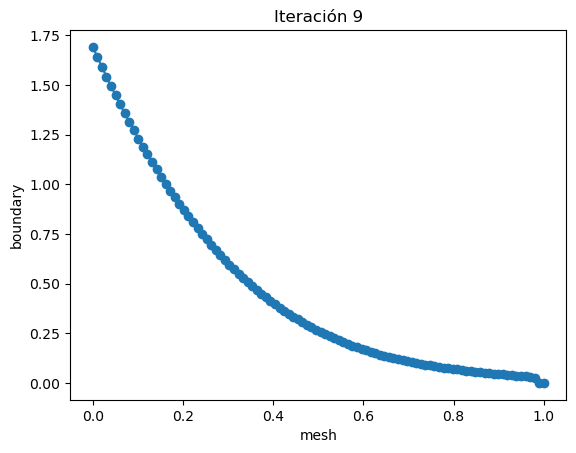

array([2.72562968, 2.63361569, 2.54395749, 2.45661789, 2.37155983,
       2.28874636, 2.2081407 , 2.12970616, 2.05340624, 1.97920457,
       1.90706495, 1.83695131, 1.76882777, 1.70265863, 1.63840834,
       1.57604156, 1.51552311, 1.45681803, 1.39989153, 1.34470907,
       1.29123626, 1.23943899, 1.18928332, 1.14073557, 1.09376229,
       1.04833026, 1.00440652, 0.96195835, 0.9209533 , 0.88135919,
       0.8431441 , 0.80627639, 0.77072472, 0.73645802, 0.70344555,
       0.67165684, 0.64106176, 0.61163048, 0.5833335 , 0.55614165,
       0.5300261 , 0.50495834, 0.48091022, 0.45785391, 0.43576195,
       0.41460716, 0.39436275, 0.37500219, 0.35649928, 0.33882809,
       0.32196295, 0.30587843, 0.29054932, 0.27595057, 0.26205733,
       0.24884487, 0.23628862, 0.22436412, 0.21304704, 0.20231319,
       0.19213855, 0.1824993 , 0.17337182, 0.1647328 , 0.15655925,
       0.14882859, 0.14151867, 0.13460785, 0.12807506, 0.12189982,
       0.11606228, 0.11054328, 0.10532431, 0.10038756, 0.09571

In [7]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_EDUARDO_step_by_step(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6, max_iter=10)

## Perspectiva Abel

In [ ]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_1 = normal_boundary_ABEL(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6)
normal_boundary_2 = normal_boundary_ABEL(mesh = t_mesh, m = 0, gamma = 1/10, tol = 1e-6)
normal_boundary_3 = normal_boundary_ABEL(mesh = t_mesh, m = 0, gamma = 1/100, tol = 1e-6)
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(t_mesh, normal_boundary_1, 'g-', label="Normal sd=1/2 boundary")
plt.plot(t_mesh, normal_boundary_2, 'r-', label="Normal sd=1/10 boundary")
plt.plot(t_mesh, normal_boundary_3, 'y-', label="Normal sd=1/100 boundary")
plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
plt.xlabel("t")
plt.ylabel("z")
plt.title(f"Perspectiva de Abel")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## Perspectiva Eduardo

In [ ]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_1 = normal_boundary_EDUARDO(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6)
normal_boundary_2 = normal_boundary_EDUARDO(mesh = t_mesh, m = 0, gamma = 1/10, tol = 1e-6)
normal_boundary_3 = normal_boundary_EDUARDO(mesh = t_mesh, m = 0, gamma = 1/100, tol = 1e-6)
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(t_mesh, normal_boundary_1, 'g-', label="Normal sd=1/2 boundary")
plt.plot(t_mesh, normal_boundary_2, 'r-', label="Normal sd=1/10 boundary")
plt.plot(t_mesh, normal_boundary_3, 'y-', label="Normal sd=1/100 boundary")
plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
plt.xlabel("t")
plt.ylabel("z")
plt.title(f"Perspectiva de Eduardo")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()